<a href="https://colab.research.google.com/github/FatmaAMR/Iris-Flower-Classification/blob/main/Iris_Flowes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Flower Classification**

This project focuses on classifying the famous Iris Flower Dataset using modern machine learning practices. I explored multiple architectures and techniques to handle model randomness, monitor training, and improve performance. I also compared traditional logistic regression with deep learning models.

---

[Dataset info.](https://www.kaggle.com/datasets/arshid/iris-flower-dataset/code)


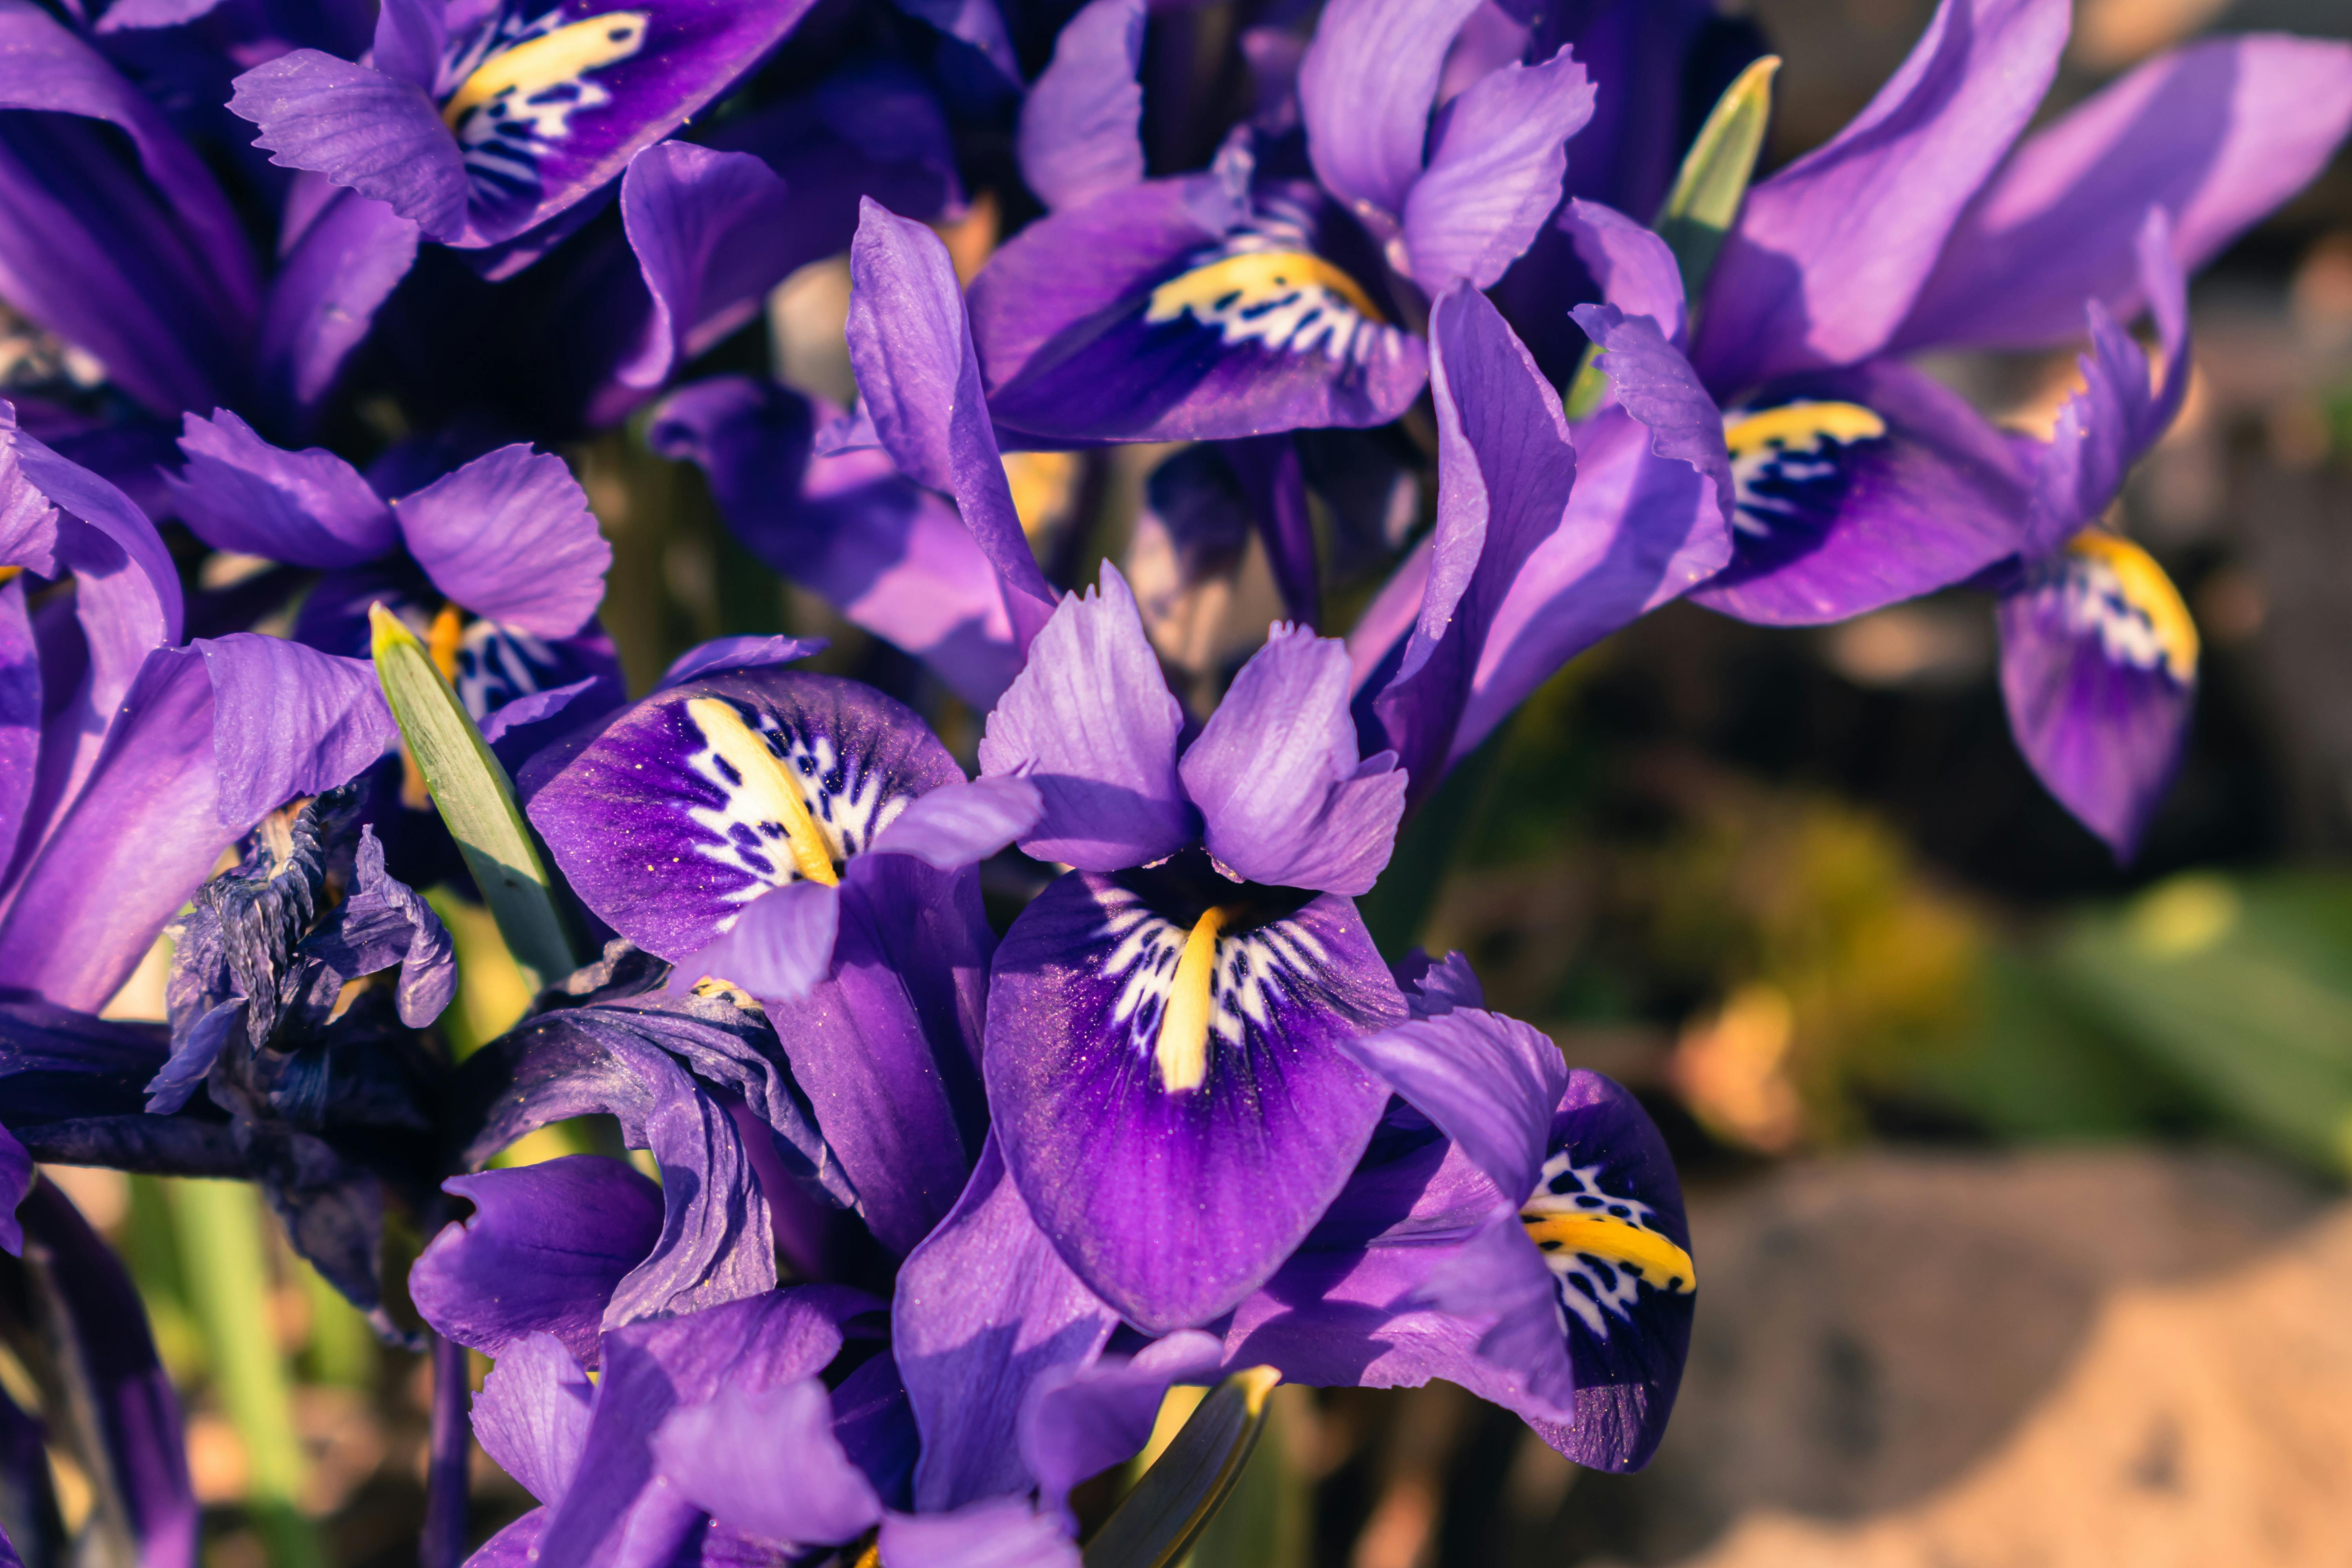

## **Randommness Control**

In [683]:
import os
import random
import numpy as np
import tensorflow as tf

def set_seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seed(42)


## **Data Collection**

In [684]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris-flower-dataset


In [685]:
import os

# See what file(s) actually exist in the path
print("Files in folder:")
print(os.listdir(path))


Files in folder:
['IRIS.csv']


In [686]:
import pandas as pd
import os

# Example: Load the CSV file
file_path = os.path.join(path, "IRIS.csv")  # or check the actual file name in that folder

df = pd.read_csv(file_path)

print(df.head())  # Show the first few rows


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## **Preparing Environment**

In [687]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [688]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd

## **Data Preprocessing**

In [689]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [690]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [691]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [692]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

## **Train/Test Split**

In [693]:
from sklearn.model_selection import train_test_split
X = df.drop('species', axis=1)
y = df['species']

In [694]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **DNN Model Building**

### **Feature Columns and Input function**

**❌ No longer used after *version is 2.13 or higher* in Tensorflow.**


In [695]:
feature_columns = []
for key in x_train.keys():
  feature_columns.append(tf.feature_column.numeric_column(key=key))
print(feature_columns)

[NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [696]:
def create_input_fn(x, y, batch_size=30, shuffle=True, num_epochs=10):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(x), y))
    if shuffle:
      dataset = dataset.shuffle(50).repeat(num_epochs)
    return dataset.batch(batch_size)
  return input_fn

In [697]:
train_input_fn = create_input_fn(x_train, y_train)
test_input_fn = create_input_fn(x_test, y_test, shuffle=False, num_epochs=1)

### **Model**

In [698]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',       # راقبي الخسارة على البيانات الخارجية
    patience=3,               # انتظري 3 epochs بدون تحسن قبل الإيقاف
    restore_best_weights=True  # رجعي أفضل أوزان حصلتي عليها أثناء التدريب
)

In [699]:
from tensorflow.keras import layers

# Example input shape = 4 (if using Titanic or Iris dataset with 4 features)
model = tf.keras.Sequential([
    layers.Dense(20, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split=0.2, callbacks=[early_stop])



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3542 - loss: 1.0607 - val_accuracy: 0.5000 - val_loss: 0.8993
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3542 - loss: 1.0078 - val_accuracy: 0.5000 - val_loss: 0.8662
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3542 - loss: 0.9600 - val_accuracy: 0.5000 - val_loss: 0.8359
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3589 - loss: 0.9160 - val_accuracy: 0.5833 - val_loss: 0.8012
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5499 - loss: 0.8714 - val_accuracy: 0.7083 - val_loss: 0.7503
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5957 - loss: 0.8198 - val_accuracy: 0.7083 - val_loss: 0.6948
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5957 - loss: 0.7713 - val_accuracy: 0.7083 - val_loss: 0.6563
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5957 - loss: 0.7327 - val_accuracy: 0.7083 - val_loss: 0.6323
Epoch 9/20


### **Model Evaluation**

In [700]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9333 - loss: 0.4832


[0.48318901658058167, 0.9333333373069763]

In [701]:
predictions = model.predict(x_test)
predicted_classes = tf.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [702]:
predictions

array([[0.02955072, 0.50689   , 0.4635592 ],
       [0.8569397 , 0.06908225, 0.07397805],
       [0.003395  , 0.39944512, 0.59715986],
       [0.03743528, 0.48606068, 0.4765041 ],
       [0.02738513, 0.5526959 , 0.419919  ],
       [0.8343707 , 0.08082048, 0.08480882],
       [0.15326858, 0.46349087, 0.38324058],
       [0.0258324 , 0.45641834, 0.5177493 ],
       [0.02614536, 0.53217226, 0.44168237],
       [0.07951679, 0.5245053 , 0.39597794],
       [0.02258443, 0.4390096 , 0.53840595],
       [0.7777739 , 0.11149741, 0.11072866],
       [0.8564443 , 0.06968011, 0.07387554],
       [0.7731917 , 0.11381426, 0.11299393],
       [0.8651329 , 0.06415347, 0.07071355],
       [0.04545584, 0.4700447 , 0.48449942],
       [0.00988286, 0.37263438, 0.6174827 ],
       [0.05816313, 0.5335845 , 0.40825242],
       [0.0334953 , 0.47644487, 0.4900599 ],
       [0.01090064, 0.38759595, 0.60150343],
       [0.77602726, 0.1110395 , 0.11293315],
       [0.02380474, 0.4390073 , 0.53718793],
       [0.

In [703]:
print(predicted_classes)
print(y_test)

tf.Tensor([1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 2 2 0 2 0 2 2 2 2 2 0 0], shape=(30,), dtype=int64)
73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: species, dtype: int64


In [704]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.33%


## **Logistic Regression Model Building**

In [705]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [706]:
y_pred = model.predict(x_test)

In [707]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [708]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


## **Linear Regression Model Building**

In [709]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [710]:
#model.score(x_test, y_test)

In [711]:
y_pred = model.predict(x_test)
y_pred

array([ 1.2305166 , -0.04088817,  2.22162345,  1.34972015,  1.28607917,
        0.02346565,  1.05796175,  1.82557039,  1.37219259,  1.06898774,
        1.6997677 , -0.0725704 , -0.15476151, -0.06513544, -0.02320247,
        1.39524413,  1.99939235,  1.04970178,  1.28040501,  1.97315432,
        0.03134273,  1.59775615,  0.09419949,  1.91821542,  1.83026281,
        1.88002641,  1.78919243,  2.03257165,  0.0373074 ,  0.02643301])

In [712]:
import numpy as np
from sklearn.metrics import accuracy_score

# Convert continuous prediction to nearest class (0, 1, 2)
y_pred_class = np.round(y_pred).astype(int)

# Make sure values are clipped between valid class labels
y_pred_class = np.clip(y_pred_class, 0, 2)

# Then use accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%
